<a href="https://colab.research.google.com/github/athens-21/DE242/blob/main/Text_Mining_Phuwamin_konthong_DE242.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 18 march 2025
Name: Phuwamin konthong

In [ ]:
corpus = ['A cat and a dog were sleeping quitely on my#bed',
'Another dog SITS on my face!!!']

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
word_set = set()
for doc in corpus:
  words = word_tokenize(doc)
  word_set.update(words)
print('Number of unique words in the corpus:',len(word_set))
print('The words in the corpus: \n', word_set)


Number of unique words in the corpus: 16
The words in the corpus: 
 {'cat', 'SITS', 'face', '#', 'A', 'Another', 'on', '!', 'and', 'were', 'a', 'quitely', 'bed', 'sleeping', 'my', 'dog'}


In [ ]:
import re
cleaned_word_set = [re.sub(r'\W+', '', word.lower()) for word in word_set]
print(cleaned_word_set)

['cat', 'sits', 'face', '', 'a', 'another', 'on', '', 'and', 'were', 'a', 'quitely', 'bed', 'sleeping', 'my', 'dog']


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
customized_stopwords = stopwords.words('english')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
customized_stopwords.append('another')
customized_stopwords.append('quietly')
print (customized_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
cleaned_word_set_without_sw = [word.lower() for word in cleaned_word_set if not word in customized_stopwords]
print(cleaned_word_set_without_sw)

['cat', 'sits', 'face', '', '', 'quitely', 'bed', 'sleeping', 'dog']


In [ ]:
cleaned_word_set_without_sw =[]

In [ ]:
for word in cleaned_word_set:
  if not word in customized_stopwords:
    cleaned_word_set_without_sw.append(word.lower())

print(cleaned_word_set_without_sw)

['cat', 'sits', 'face', '', '', 'quitely', 'bed', 'sleeping', 'dog']


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_word_set = [ps.stem(word) for word in cleaned_word_set_without_sw if len(word)>0]
print(stemmed_word_set)

['cat', 'sit', 'face', 'quit', 'bed', 'sleep', 'dog']


In [ ]:
import pandas as pd

mydf = pd.DataFrame(corpus, columns=['text'])
mydf.head()

,text
0,A cat and a dog were sleeping quitely on my#bed
1,Another dog SITS on my face!!!


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

def preprocess_raw_text(raw_text):
  word_set = word_tokenize(raw_text)
  cleaned_word_set = [re.sub(r'\W+', '', word.lower()) for word in word_set]
  cleaned_word_set_without_sw = [word.lower() for word in cleaned_word_set
  if not word in customized_stopwords]
  stemmed_word_set = [ps.stem(word) for word in cleaned_word_set_without_sw if len(word)>0]
  return stemmed_word_set


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
mydf['pre_processed_text'] = mydf['text'].map(lambda x: preprocess_raw_text(x))
mydf.head()


,text,pre_processed_text
0,A cat and a dog were sleeping quitely on my#bed,"[cat, dog, sleep, quit, bed]"
1,Another dog SITS on my face!!!,"[dog, sit, face]"


In [ ]:
n_docs = len(corpus)#Number of documents in the corpus
n_words_set = len(stemmed_word_set) #Number of unique words in the corpus


In [ ]:
print(n_docs)

2


In [ ]:
for i in range(len(mydf)):
    print(mydf.iloc[i, 1]) # Access the 'pre_processed_text' column (index 1)

['cat', 'dog', 'sleep', 'quit', 'bed']
['dog', 'sit', 'face']


In [ ]:
n_words_set

7

In [ ]:
import numpy as np
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=stemmed_word_set)
df_tf.head()


,cat,sit,face,quit,bed,sleep,dog
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(len(mydf)):#for each row/doc
  words = mydf.iloc[i, 1] # Words in the document
  for w in words:
        df_tf.loc[i, w] = df_tf.loc[i, w]+1
df_tf

,cat,sit,face,quit,bed,sleep,dog
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
import numpy as np
import pandas as pd
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=stemmed_word_set)
df_tf.head()
# %%
for i in range(len(mydf)):
  words = mydf.iloc[i, 1]
  for w in words:
    df_tf.loc[i, w] = df_tf.loc[i, w]+1
df_tf

,cat,sit,face,quit,bed,sleep,dog
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
normalized_df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=stemmed_word_set)

In [ ]:
for i in range(len(mydf)):#for each row/doc
  words = mydf.iloc[i, 1] # Words in the document
  for w in words:
    normalized_df_tf.loc[i, w] = df_tf.loc[i, w]+(1 / len(words))
normalized_df_tf

,cat,sit,face,quit,bed,sleep,dog
0,0.2,0.000000,0.000000,0.2,0.2,0.2,0.200000
1,0.0,0.333333,0.333333,0.0,0.0,0.0,0.333333


In [ ]:
idf = {}
for w in stemmed_word_set:
    k = 0 # number of documents in the corpus that contain this word
    for i in range(n_docs):
        if w in mydf.iloc[i, 1]:
            k += 1
    idf[w] = np.log10(n_docs / k)
    print(f'{w:>15}: {idf[w]:>10}' )

            cat: 0.3010299956639812
            sit: 0.3010299956639812
           face: 0.3010299956639812
           quit: 0.3010299956639812
            bed: 0.3010299956639812
          sleep: 0.3010299956639812
            dog:        0.0


In [ ]:
def findNumberOfDocumentsThatAWordIsPresent(word):
    cnt = 0
    for i in range(n_docs):
        if word in mydf.iloc[i, 1]: # Corrected: Use 'word' instead of 'w'
            cnt += 1
    return cnt

df_idf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=stemmed_word_set)
# Compute Inverse Document Frequency (IDF)
for i in range(len(mydf)):#for each row/doc
    words = mydf.iloc[i, 1] # Words in the document
    for w in words:
        k = findNumberOfDocumentsThatAWordIsPresent(w)
        df_idf.loc[i, w] = np.log10(n_docs / k)
df_idf

,cat,sit,face,quit,bed,sleep,dog
0,0.30103,0.00000,0.00000,0.30103,0.30103,0.30103,0.0
1,0.00000,0.30103,0.30103,0.00000,0.00000,0.00000,0.0


In [ ]:
df_tf_idf = normalized_df_tf.copy()
for w in stemmed_word_set:
    for i in range(n_docs): # Corrected: Indented this line
        df_tf_idf.loc[i, w] = df_tf.loc[i, w] * idf[w] # Corrected: Indented this line
df_tf_idf

,cat,sit,face,quit,bed,sleep,dog
0,0.30103,0.00000,0.00000,0.30103,0.30103,0.30103,0.0
1,0.00000,0.30103,0.30103,0.00000,0.00000,0.00000,0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

In [ ]:
corpus = ['A cat and a dog were sleeping quitely on my#bed','Another dog SITS on my face!!!']

In [ ]:
#Clean document in the corpous
pre_processed_corpus=[]
for i in range(len(corpus)):
    processed_corpus = preprocess_raw_text(corpus[i]) # Indented this line
    joined = " ".join(processed_corpus) # Indented this line
    pre_processed_corpus.append(joined) # Indented this line
print(pre_processed_corpus)

['cat dog sleep quit bed', 'dog sit face']


In [ ]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word', stop_words= 'english')

In [ ]:
count_wm = countvectorizer.fit_transform(pre_processed_corpus)
tfidf_wm = tfidfvectorizer.fit_transform(pre_processed_corpus)

In [ ]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [ ]:
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],
columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],
columns = tfidf_tokens)

In [ ]:
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      bed  cat  dog  face  quit  sit  sleep
Doc1    1    1    1     0     1    0      1
Doc2    0    0    1     1     0    1      0

TD-IDF Vectorizer

           bed       cat       dog      face      quit       sit     sleep
Doc1  0.471078  0.471078  0.335176  0.000000  0.471078  0.000000  0.471078
Doc2  0.000000  0.000000  0.449436  0.631667  0.000000  0.631667  0.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks')
os.getcwd()


'/content/drive/My Drive/Colab Notebooks'

In [ ]:
df= ('/content/drive/MyDrive/Colab Notebooks/dataset2/1377884570_tweet_global_warming.csv', )

In [ ]:
import csv
with open('/content/drive/MyDrive/Colab Notebooks/dataset2/1377884570_tweet_global_warming.csv', 'rt', encoding='ISO-8859-1') as infile, \
     open('fixed_tweet_global_warming.csv', 'wt') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for line in reader:
        newline = [','.join(line[:-2])] + line[-2:]
        writer.writerow(newline)


In [ ]:
import pandas as pd
df = pd.read_csv('fixed_tweet_global_warming.csv', encoding='ISO-8859-1')
df.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [ ]:
df.shape

(6090, 3)

In [ ]:
df.columns.tolist()

['tweet', 'existence', 'existence.confidence']

In [ ]:
df.dtypes

,0
tweet,object
existence,object
existence.confidence,float64


In [ ]:
df.drop('existence.confidence', axis=1, inplace=True)
df.columns.tolist()

['tweet', 'existence']

In [ ]:
rt_rows = df[df['tweet'].str.startswith('RT @')].index.tolist()
len(rt_rows)


762

In [ ]:
>>> df.drop(rt_rows, inplace=True)
>>> len(df)

5328

In [ ]:
>>> df['existence'].value_counts(dropna=False)


,count
existence,
Y,2202
NaN,1667
N,901
Yes,501
No,57


In [ ]:
>>> nan_rows = df[df['existence'].isnull()].index.tolist()
>>> len(nan_rows)

1667

In [ ]:
>>> df.drop(nan_rows, inplace=True)
>>> len(df)

3661

In [ ]:
>>> df['existence'].value_counts(dropna=False)

,count
existence,
Y,2202
N,901
Yes,501
No,57


In [ ]:
df['existence'] = df['existence'].replace({'Y': 1, 'Yes': 1}).astype(int)
df['existence'] = df['existence'].replace({'N': 0, 'No': 0}).astype(int)

df['existence'].value_counts()

,count
existence,
1,2703
0,958


In [ ]:
>>> import re
>>> import pandas as pd
>>> from nltk import word_tokenize
>>> from nltk.corpus import stopwords
>>> from nltk.stem import PorterStemmer
>>> from nltk.stem import WordNetLemmatizer
>>> from datetime import datetime as dt


In [ ]:
>>> import nltk
>>> nltk.download('punkt')
>>> nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
>>> porter = PorterStemmer()
>>> wn_lemmatizer = WordNetLemmatizer()


In [ ]:
def preprocess_raw_text(raw_tweet):
    #Remove url -- detect http://, https://, www. and www2.
    pattern = r'(https?://[A-Za-z0-9./]+|www[\d]?\.[^ ]+)'
    cleaned_url_tweet = re.sub(pattern, ' ', raw_tweet)
    #Replace non-characters with a whitespace
    cleaned_character_tweet = re.sub("[^a-zA-Z]", " ", cleaned_url_tweet)
    #Convert texts to lowercase and tokenize them into individual words
    words = word_tokenize(cleaned_character_tweet.lower())
    #Remove stopwords
    stopword_set = set(stopwords.words('english'))
    meaningful_words = [w for w in words if w not in stopword_set]
    #Select either stemming or lemmatizing
    stemmed_words = [porter.stem(w) for w in meaningful_words]
    cleaned_word_list = " ".join(stemmed_words)
    #lemmatized_words = [wn_lemmatizer.lemmatize(w) for w in meaningful_words]
    #cleaned_word_list = ' '.join(lemmatized_words)
    return cleaned_word_list

In [ ]:
>>> df['tweet'] = df['tweet'].map(lambda x: preprocess_raw_text(x))

In [ ]:
>>> df['tweet'][0]

'global warm report urg govern act brussel belgium ap world face increas hunger link'

In [ ]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['existence'],
test_size=0.2, random_state=2019)
>>> print(X_train.shape)
>>> print(X_test.shape)

(2928,)
(733,)


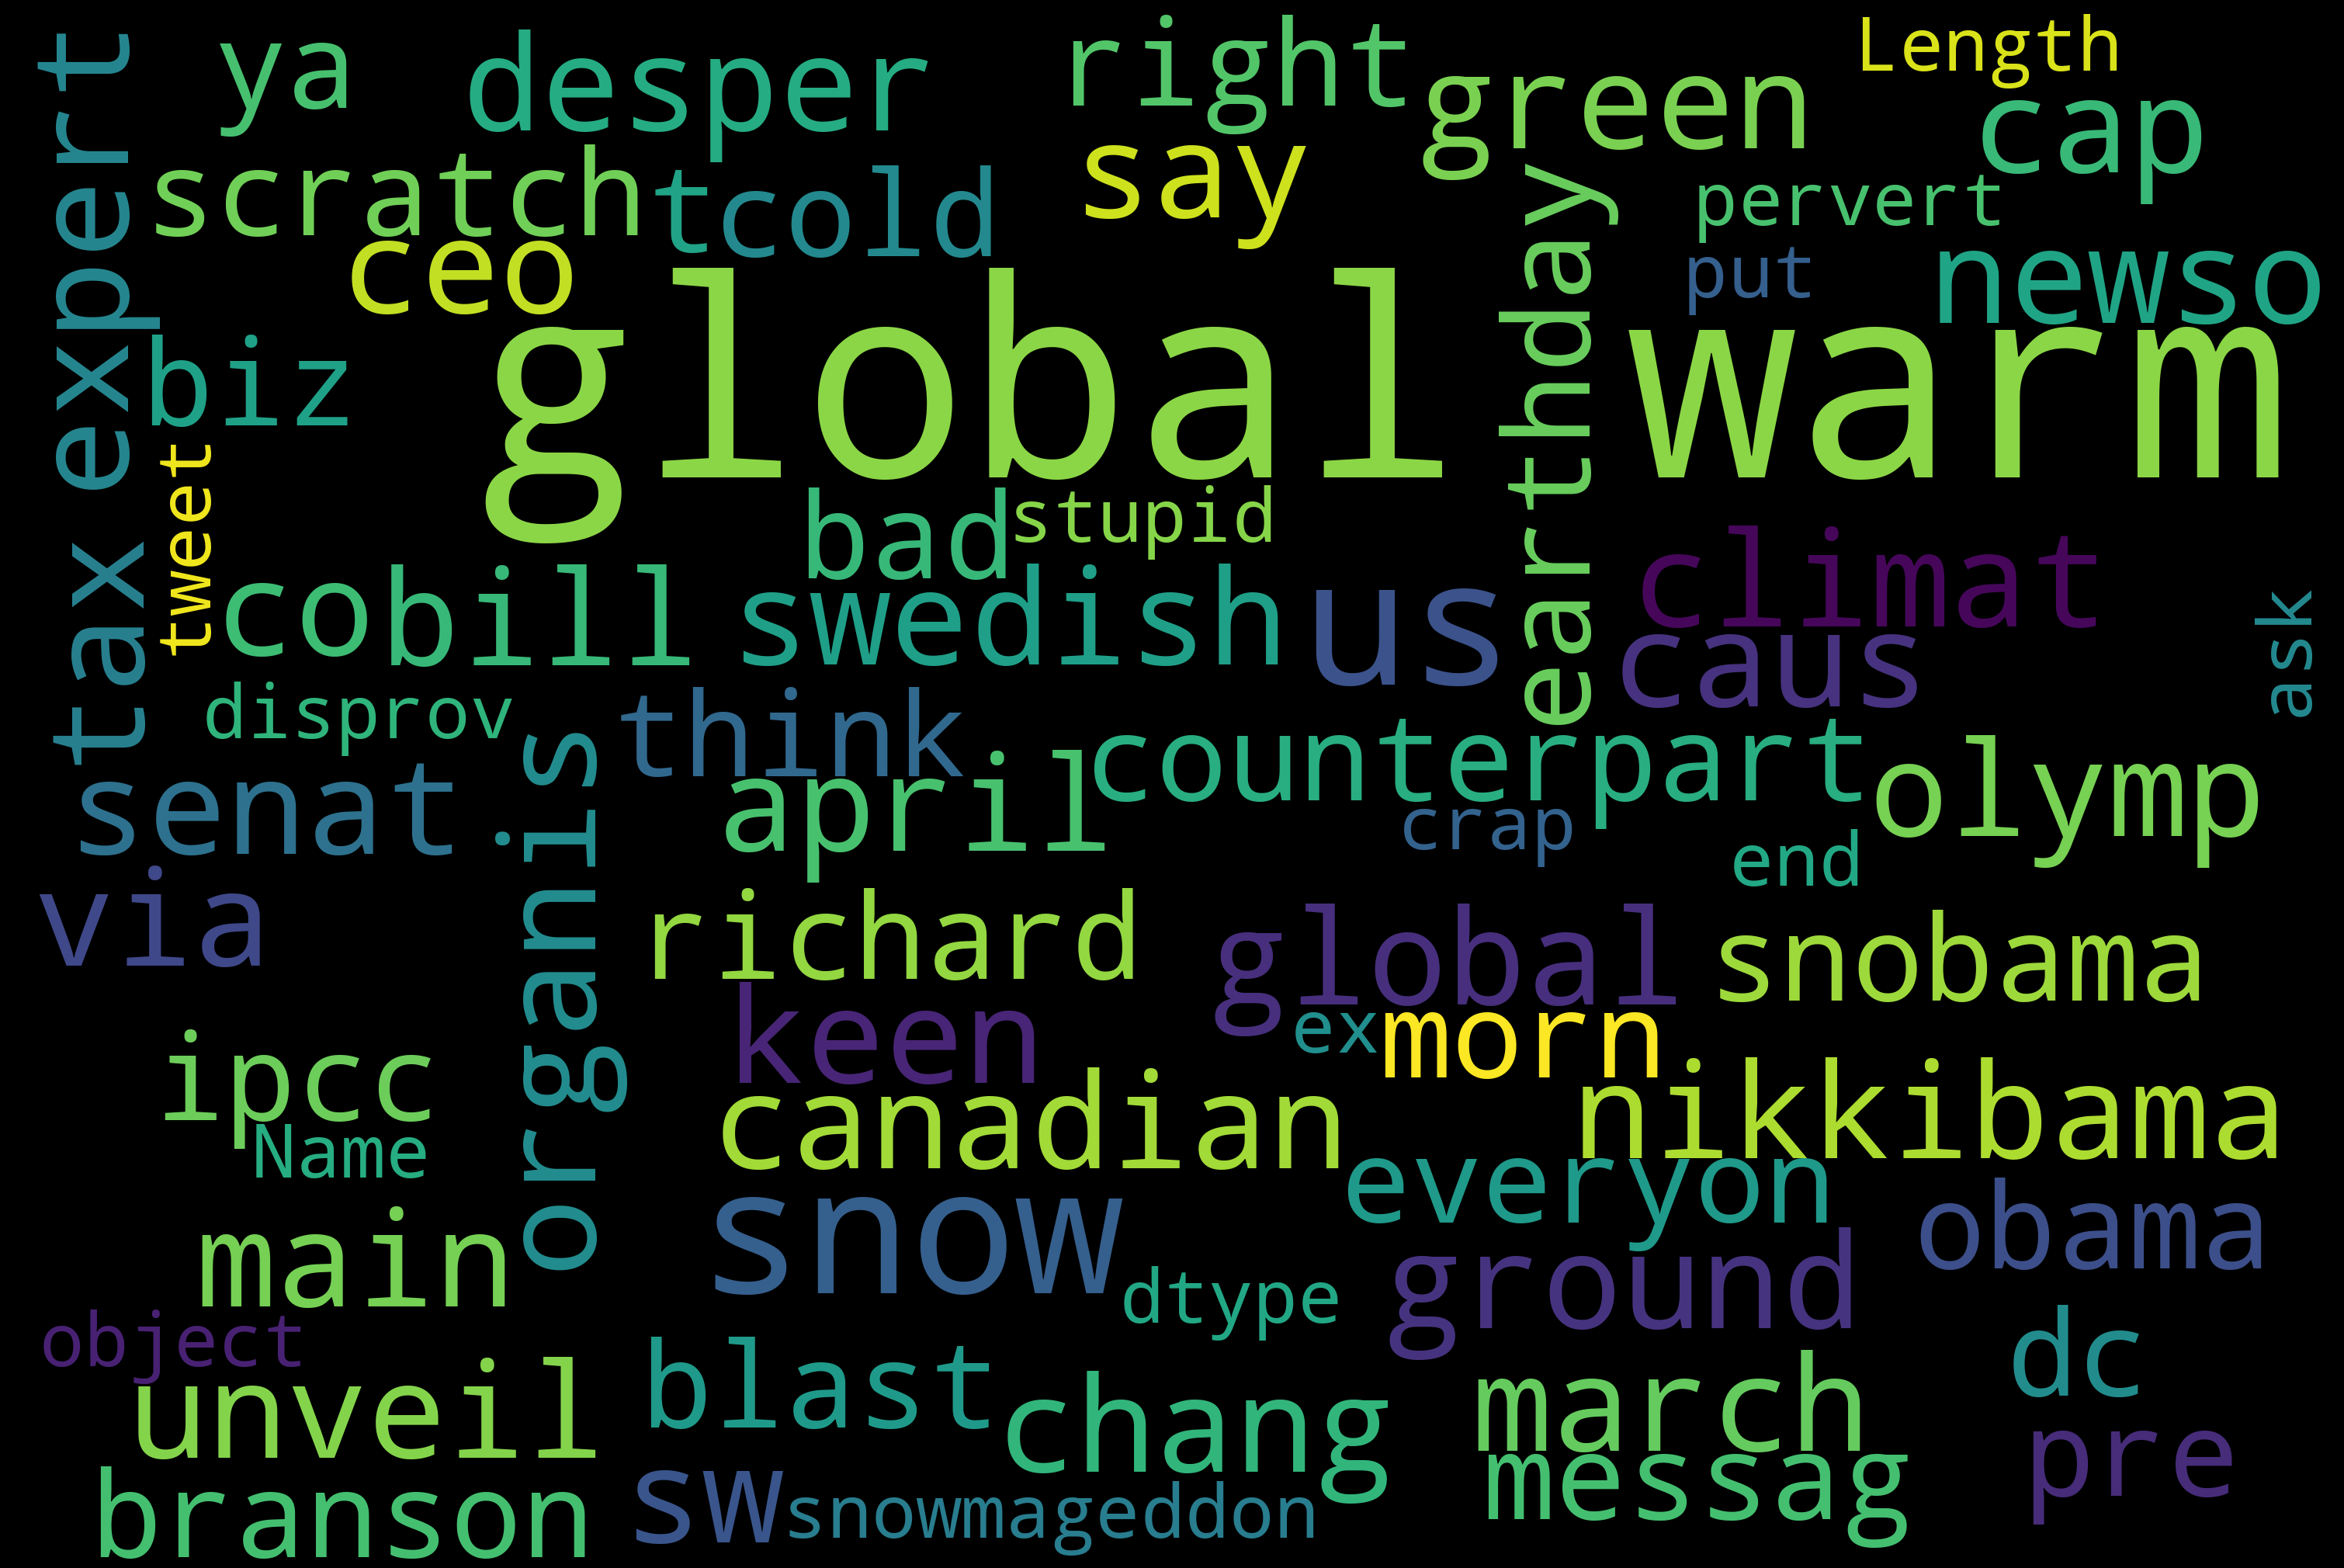

In [ ]:
>>> #https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/
>>> #https://www.geeksforgeeks.org/generating-word-cloud-python/
>>> from wordcloud import WordCloud, STOPWORDS
>>> import matplotlib.pyplot as plt
>>> text = X_train
>>> wordcloud = WordCloud(
width = 3000,
height = 2000,
background_color = 'black',
stopwords = STOPWORDS).generate(str(text))
>>> fig = plt.figure(
figsize = (30, 20),
facecolor = 'k',
edgecolor = 'k')
>>> plt.imshow(wordcloud, interpolation = 'bilinear')
>>> plt.axis('off')
>>> plt.tight_layout(pad=0)
>>> plt.show()

In [ ]:
>>> most_common_words = pd.Series(' '.join(X_train).split()).value_counts()[:10]
>>> most_common_words

,count
global,1780
warm,1730
climat,1632
chang,1537
link,406
via,253
new,152
snow,147
news,125
tcot,117


In [ ]:
>>> most_common_words_lst = list(most_common_words.index)
>>> X_train = X_train.map(lambda x: ' '.join(x for x in x.split() if x not in
most_common_words_lst))

In [ ]:
>>> word_counts = pd.Series(' '.join(X_train).split()).value_counts()
>>> least_freq_words_lst = list(word_counts[word_counts==1].index)
>>> X_train = X_train.map(lambda x: ' '.join(x for x in x.split() if x not in
least_freq_words_lst))

In [ ]:
>>> from sklearn.feature_extraction.text import TfidfVectorizer
>>> #Construct a tf-idf vector space model of the training set
>>> tfidf_vectorizer = TfidfVectorizer()
>>> tfidf_vsm_train = tfidf_vectorizer.fit_transform(X_train)
>>> print(len(tfidf_vectorizer.get_feature_names_out()))

2565


In [ ]:
>>> tfidf_vsm_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
>>> #Construct a tf-idf vector space model of the test set
>>> tfidf_vsm_test = tfidf_vectorizer.transform(X_test)
>>> tfidf_vsm_test.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
>>> from sklearn.linear_model import LogisticRegression
>>> classifier = LogisticRegression(solver='lbfgs')

In [ ]:
>>> classifier.fit(tfidf_vsm_train, y_train)


LogisticRegression()

In [ ]:
>>> predictions = classifier.predict(tfidf_vsm_test)
>>> print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 

In [ ]:
>>> from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
>>> accuracy = accuracy_score(y_test, predictions)
>>> precision = precision_score(y_test, predictions)
>>> recall = recall_score(y_test, predictions)
>>> f1 = f1_score(y_test, predictions)
>>> print("Performance:")
>>> print(" >accuracy = " + str(accuracy))
>>> print(" >precision = " + str(precision))
>>> print(" >recall = " + str(recall))
>>> print(" >f1 = " + str(f1))


Performance:
 >accuracy = 0.7899045020463847
 >precision = 0.7866868381240545
 >recall = 0.975609756097561
 >f1 = 0.8710217755443886
